## I DID IT ALONE, CAUSE NONE OF MY GROUPMATES REPLIED WHEN I REACHED THEM OUT AND MY UPGRAD BUDDY HAS BEEN GHOSTING ME FOR 3 MONTHS ALREADY. PLUS I LIVE ON SEYCHELLES WITH TERRIBLE INTERNET SPEED, I TRIED MY BEST REALLY!

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.metrics import r2_score


from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#Import Dataset

leads_data = pd.read_csv("Leads.csv")
leads_data.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Now Let's explore data and prepare it for further steps

In [3]:
leads_data.shape

(9240, 37)

In [4]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#Check Missing Values
100*leads_data.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [6]:
#Delete all the variables that have more than 20% Null Values
leads_data = leads_data.drop(['Country', 'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)

In [7]:
leads_data.shape

(9240, 26)

#### First of all let's turn all yes/no columns into 1/0. 
These are : Do Not Email, Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview

In [8]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [9]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,Select,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,Select,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,Mumbai,0,0,Modified


now let's check how this 1/0 variables are balanced, in other words what is percentage of yes and no in those columns

In [10]:
leads_data[['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']].apply(pd.Series.value_counts)

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,8506,9238,9226,9240.0,9238,9239,9239,9236,9233,9240.0,9240.0,9240.0,9240.0,6352
1,734,2,14,NaN,2,1,1,4,7,NaN,NaN,NaN,NaN,2888


#### From here we can see that we can drop everything except "Do Not Email" and "A free copy of Mastering The Interview"
#### Because the variable that has only one value more than 99% of times doesn't help at all, it's not a variable it's just spare information

In [11]:
#Delete all the variables(1/0) that have more than 99% imbalance 
leads_data = leads_data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [12]:
leads_data.shape

(9240, 14)

In [13]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Select,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Mumbai,0,Modified


In [14]:
# Creating a dummy variable for the categorical variable and dropping the first one.
dummy1 = pd.get_dummies(leads_data['Lead Origin'], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [15]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,0,Modified,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Select,0,Email Opened,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,1,Email Opened,True,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,0,Modified,True,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Mumbai,0,Modified,True,False,False,False


In [16]:
#drop the original variable from which we crated dummies
leads_data = leads_data.drop(['Lead Origin'],  axis=1)
leads_data.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,0,Modified,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Select,0,Email Opened,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,1,Email Opened,True,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,0,Modified,True,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Mumbai,0,Modified,True,False,False,False


In [17]:
leads_data.shape

(9240, 17)

In [18]:
leads_data.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Source                                object
Do Not Email                                int64
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
City                                       object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object
Landing Page Submission                      bool
Lead Add Form                                bool
Lead Import                                  bool
Quick Add Form                               bool
dtype: object

In [19]:
#converting bools from dummies into int so that I will have 1/0 instead of True/False
bool_columns = ['Landing Page Submission', 'Lead Add Form', 'Lead Import', 'Quick Add Form']
leads_data[bool_columns] = leads_data[bool_columns].astype(int)

In [20]:
leads_data.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Source                                object
Do Not Email                                int64
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
City                                       object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object
Landing Page Submission                     int32
Lead Add Form                               int32
Lead Import                                 int32
Quick Add Form                              int32
dtype: object

In [21]:
leads_data.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,0,Modified,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Select,0,Email Opened,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,1,Email Opened,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,0,Modified,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Mumbai,0,Modified,1,0,0,0


### As that was the only categorical variable which I needed and I created dummies, now let's drop all the extra columns and leave what we need only


In [22]:
leads_data = leads_data.drop(['Prospect ID','Lead Source','Last Activity','Specialization','City','Last Notable Activity'], axis=1)

In [23]:
leads_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
0,660737,0,0,0.0,0,0.0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0


In [24]:
leads_data.shape

(9240, 11)

### Now let's check if we have outliers

In [25]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',]]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [26]:
#check missing values again
leads_data.isnull().sum()

Lead Number                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
A free copy of Mastering The Interview      0
Landing Page Submission                     0
Lead Add Form                               0
Lead Import                                 0
Quick Add Form                              0
dtype: int64

In [27]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
A free copy of Mastering The Interview    0.00
Landing Page Submission                   0.00
Lead Add Form                             0.00
Lead Import                               0.00
Quick Add Form                            0.00
dtype: float64

as we can see missing values are less then 1.5% so we can easily remove them

In [28]:
leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]


In [29]:
leads_data = leads_data[~np.isnan(leads_data['Page Views Per Visit'])]


In [30]:
#check again
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
A free copy of Mastering The Interview    0.0
Landing Page Submission                   0.0
Lead Add Form                             0.0
Lead Import                               0.0
Quick Add Form                            0.0
dtype: float64

In [31]:
leads_data.shape

(9103, 11)

### Test-Train Split

In [32]:
# Putting feature variable to X
X = leads_data.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
0,0,0.0,0,0.0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0


In [33]:
y = leads_data ['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.71, test_size=0.29, random_state=100)

### Next step is Scaling

In [35]:
#I will not rescale boolean variables 1/0
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
4670,0,0.007968,0.549046,0.018182,0,0,0,0,0
3638,0,0.000000,0.000000,0.000000,0,0,0,0,0
6752,0,0.000000,0.000000,0.000000,0,0,0,0,0
8648,0,0.007968,0.452286,0.036364,1,1,0,0,0
4812,0,0.000000,0.000000,0.000000,0,0,1,0,0


In [36]:
### Checking the Converted Rate
conv = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conv

38.02043282434362

#### Chek Correlations

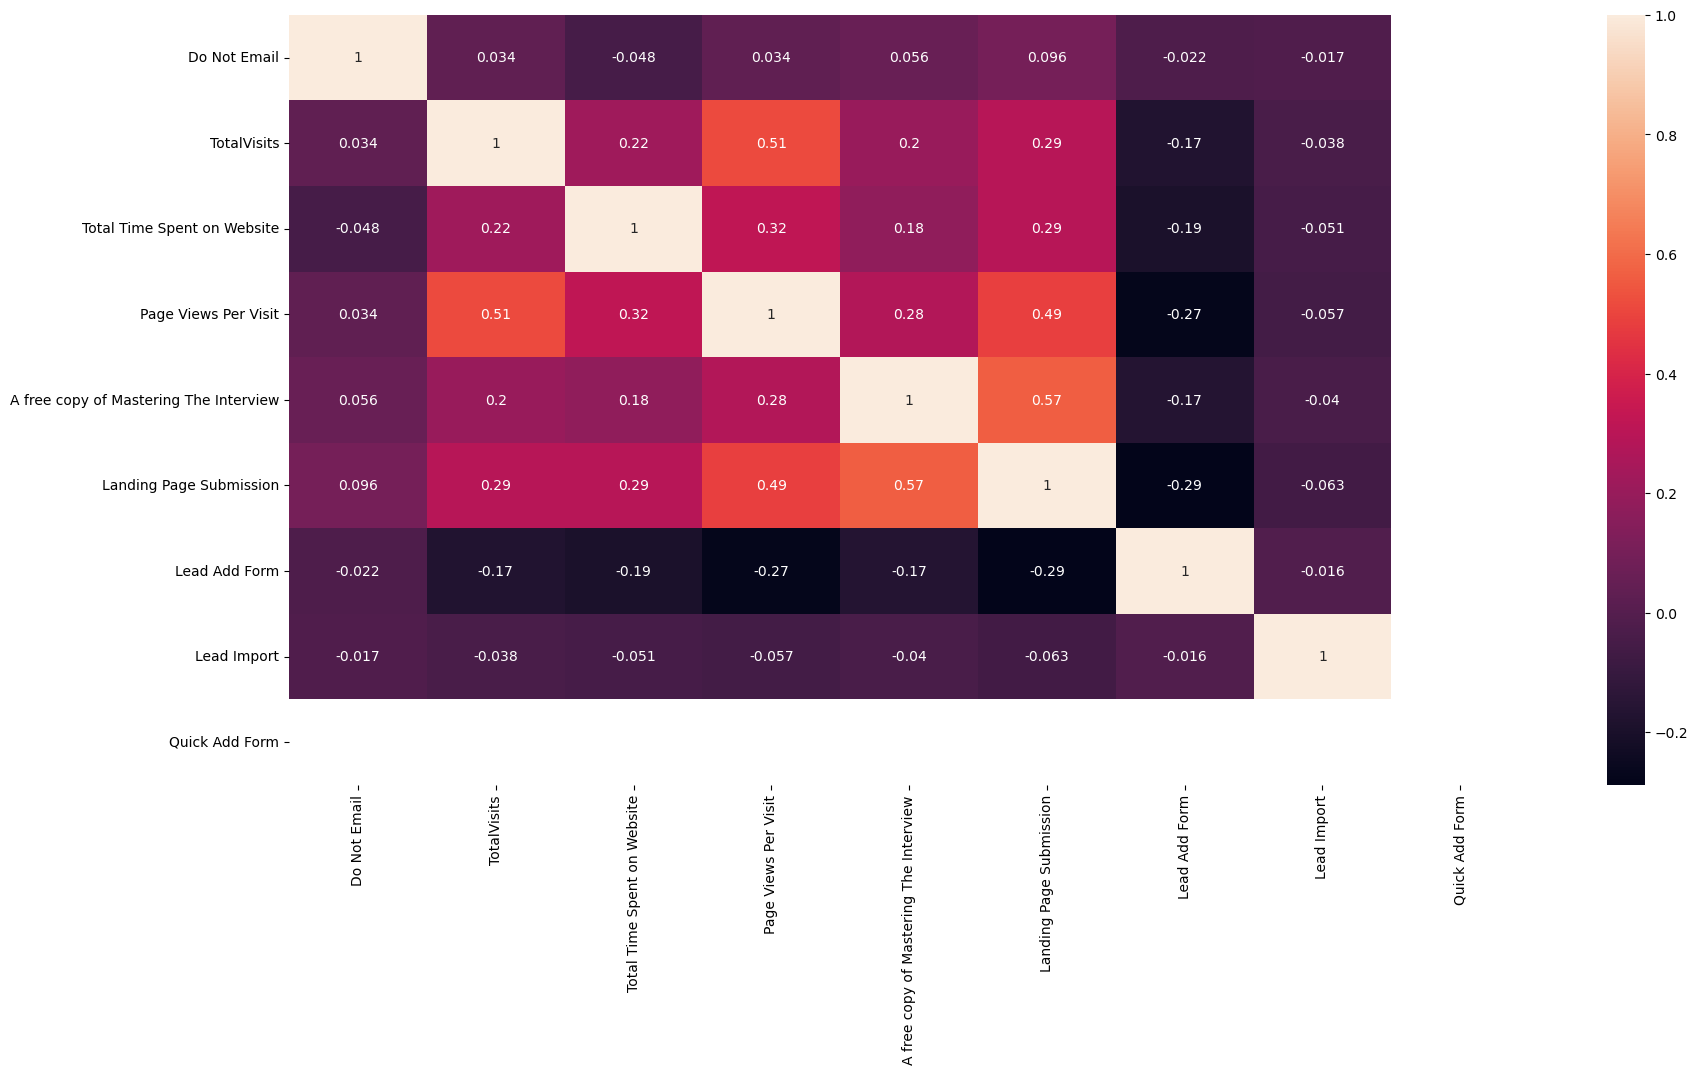

In [37]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

I'm leaving all the variables not dropping any

### BUILDING MODEL

In [38]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3275.6
Date:                Sat, 14 Sep 2024   Deviance:                       6551.2
Time:                        23:04:14   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2698
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.5177      0.059    -25.737      0.000      -1.633      -1.402
Do Not Email                              -1.3831      0.147     -9.406      0.000      -1.671      -1.095
TotalVisits                                5.1712      2.146      2.409      0.016       0.964       9.378
Total Time Spent on Website                4.2790      0.138     31.020      0.000       4.009       4.549
Page Views Per Visit                      -1.9921      1.056     -1.886      0.059      -4.062       0.078
A free copy of Mastering The Interview    -0.0852      0.077     -1.109      0.267      -0.236       0.065
Landing Page Submission                   -0.1507      0.081     -1.867      0.062      -0.309       0.008
Lead Add Form                              4.2561      0.207     20.564      0.000       3.850       4.662
Lead Import                                0.8810      0.416      2.117      0.034       0.065       1.697
Quick Add Form                                  0          0        nan        nan           0           0
==========================================================================================================
"""

From here we can see that variable "A free copy of Mastering The Interview"  has highest P value, plus it had highest correlation when we did correlation matrix. 
Based on this factors we can drop this variable

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step =5)             # running RFE with 5 variables as output
rfe = rfe.fit(X_train, y_train)

In [41]:
rfe.support_

array([ True,  True,  True, False, False, False,  True, False, False])

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 2),
 ('Landing Page Submission', False, 2),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 2),
 ('Quick Add Form', False, 2)]

In [43]:
col = X_train.columns[rfe.support_]

In [44]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Import', 'Quick Add Form'],
      dtype='object')

#### Assesing with StatsModels

In [45]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3286.8
Date:                Sat, 14 Sep 2024   Deviance:                       6573.7
Time:                        23:04:25   Pearson chi2:                 6.59e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2673
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6399      0.049    -33.382      0.000      -1.736      -1.544
Do Not Email                   -1.4022      0.146     -9.627      0.000      -1.688      -1.117
TotalVisits                     2.2056      1.455      1.516      0.129      -0.645       5.056
Total Time Spent on Website     4.1141      0.131     31.432      0.000       3.858       4.371
Lead Add Form                   4.3808      0.204     21.438      0.000       3.980       4.781
===============================================================================================
"""

In [46]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

4670    0.653972
3638    0.162483
6752    0.162483
8648    0.559335
4812    0.939401
3218    0.162483
7982    0.737812
1026    0.653584
7349    0.820220
1071    0.162483
dtype: float64

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [47]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
4670,0,0.653972,4670
3638,0,0.162483,3638
6752,0,0.162483,6752
8648,1,0.559335,8648
4812,1,0.939401,4812


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.22 else 0 

## I TOOK THIS VALUE OF 0.23 AS CUT OFF BECAUSE TO GET RECALL >80% , AS REQUESTED 

In [48]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.23 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
4670,0,0.653972,4670,1
3638,0,0.162483,3638,0
6752,0,0.162483,6752,0
8648,1,0.559335,8648,1
4812,1,0.939401,4812,1


let's  check confusion matrix

In [49]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2357 1650]
 [ 490 1966]]


In [50]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.6688844190004641


#### Now Let's check VIFs

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values.astype(float), i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,1.36
2,Total Time Spent on Website,1.35
0,Do Not Email,1.04
3,Lead Add Form,1.00


all of them are under 1.5 so this variables are staying of course , because VIF' are low, no need to rebuild the model

#### Metrics beyond accuracy

In [52]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [53]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8004885993485342

In [54]:
# Let us calculate specificity
TN / float(TN+FP)

0.5882206139256302

In [55]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.41177938607436987


In [56]:
# positive predictive value 
print (TP / float(TP+FP))

0.5436946902654868


In [57]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8278890059711977


#### Precision and Recall

In [58]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2357, 1650],
       [ 490, 1966]], dtype=int64)

In [59]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.5436946902654868

In [60]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8004885993485342

In [61]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8004885993485342

#### To get Recall higher than 80% I had to sacrifice precision of course, that's why I took 0.23 as cut off point

### Now Let's Make Predictions on test set

In [62]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [63]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Add Form
3504,0,0.011952,0.188194,0
4050,0,0.000000,0.000000,1
7201,1,0.007968,0.316023,0
1196,0,0.015936,0.187750,0
8219,0,0.027888,0.109632,0


In [64]:
X_test_sm = sm.add_constant(X_test)

In [65]:
y_test_pred = res.predict(X_test_sm.astype(float))

In [66]:
y_test_pred[:10]

3504    0.301691
4050    0.939401
7201    0.151313
1196    0.303160
8219    0.244656
8747    0.162483
9048    0.539783
6524    0.212786
7693    0.059745
8187    0.939401
dtype: float64

In [67]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [68]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [69]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [70]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [71]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [72]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3504,0.301691
1,1,4050,0.939401
2,0,7201,0.151313
3,0,1196,0.303160
4,1,8219,0.244656


In [73]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [74]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Lead Number', 'Converted', 'Converted_Prob'])

In [75]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,3504,0,0.301691
1,4050,1,0.939401
2,7201,0,0.151313
3,1196,0,0.303160
4,8219,1,0.244656


In [76]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.23 else 0)

In [77]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,3504,0,0.301691,1
1,4050,1,0.939401,1
2,7201,0,0.151313,0
3,1196,0,0.303160,1
4,8219,1,0.244656,1


In [78]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.6602272727272728

In [79]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[939, 696],
       [201, 804]], dtype=int64)

In [80]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [81]:
#Sensitivity 
TP / float(TP+FN)

0.8

In [82]:
#Specificity
TN / float(TN+FP)

0.5743119266055046

## Our RECALL is 0.8 and we are Happy, although to be honest I don't like this model :) 